# Census

## Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando o DataFrame 

In [2]:
census = pd.read_csv("../datasets/census.csv")
census.head()

,Unnamed: 0,age,workclass,final.weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loos,hour.per.week,native.country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Tipo de Dados

- Unnamed: 0 - Numérico Discreto (Sem utilidade)
- age (idade)- Numérico Discreto
- wordclass (tipo de emprego) - Categórico Nominal
- final.weight (peso final) - Numérico contínuo
- education (educação)- Categórica Ordinal
- education.num (anos de estudos) - Numérico Discreto
- marital.status (estado civil) - CCategórica Nominal
- occupation (trabalho) - Categórica Nominal
- relationship (relação)  - Categórica Nominal
- race (raça) - Categórica Nominal
- sex (sexo) - Categórica Nominal
- capital.gain (ganho de capital) - Numérica Contínua
- capital.loss (perda de capital) - Numérica Contínua
- hours.week (horas da semana) - Numética Discreta
- native.country (pais de origem) - Categórica Nominal
- income (renda anual) - Classe Alvo - Categórica Ordinal

In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   final.weight    30162 non-null  int64 
 4   education       30162 non-null  object
 5   education.num   30162 non-null  int64 
 6   marital.status  30162 non-null  object
 7   occupation      30162 non-null  object
 8   relationship    30162 non-null  object
 9   race            30162 non-null  object
 10  sex             30162 non-null  object
 11  capital.gain    30162 non-null  int64 
 12  capital.loos    30162 non-null  int64 
 13  hour.per.week   30162 non-null  int64 
 14  native.country  30162 non-null  object
 15  income          30162 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.7+ MB


## Sumário Estatístico

In [5]:
census.describe()

,Unnamed: 0,age,final.weight,education.num,capital.gain,capital.loos,hour.per.week
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,16288.103242,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,9383.401676,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,1.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,8179.250000,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,16286.500000,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,24402.750000,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Estudo das Variáveis

### age

- Sem valores inválidos

In [7]:
census['age'].describe()

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [4]:
print(census['age'].isna().sum(), census['age'].isnull().sum())

0 0


<AxesSubplot:xlabel='age', ylabel='Count'>

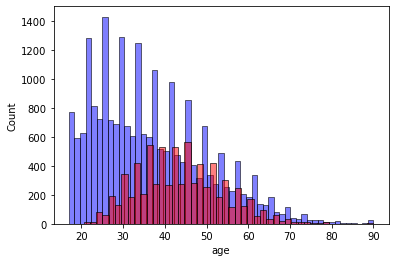

In [24]:
# Idade por cada renda anual
sns.histplot(x = 'age' , data = census[census['income'] == ' <=50K'], color='blue', alpha = 0.5)
sns.histplot(x = 'age' , data = census[census['income'] != ' <=50K'], color = 'red', alpha = 0.5)

### workclass

- Sem valores Inválidos

In [6]:
census['workclass'].value_counts(dropna=False)

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

<AxesSubplot:xlabel='count', ylabel='workclass'>

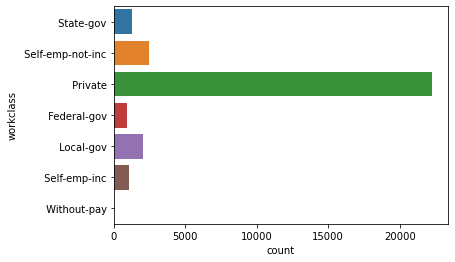

In [49]:
sns.countplot(y = census.workclass)

###  final.weight

- Sem valores inválidos

In [28]:
census['final.weight'].describe()

count    3.016200e+04
mean     1.897938e+05
std      1.056530e+05
min      1.376900e+04
25%      1.176272e+05
50%      1.784250e+05
75%      2.376285e+05
max      1.484705e+06
Name: final.weight, dtype: float64

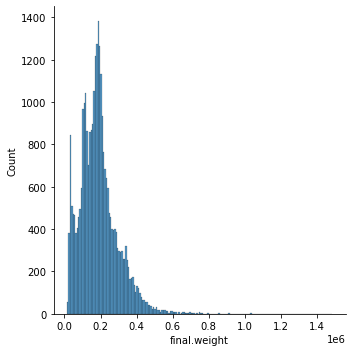

In [29]:
sns.displot(x = census['final.weight'])

### education 

- Sem valores inválidos encontrados

In [30]:
census['education'].value_counts(dropna=False)

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

<AxesSubplot:xlabel='count', ylabel='education'>

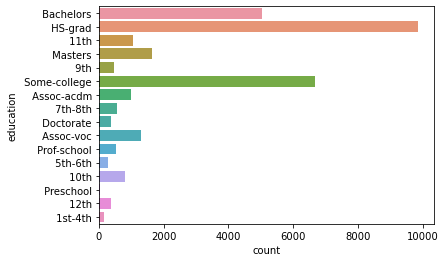

In [48]:
sns.countplot(y = census.education)

### education.num 

- Sem valores inválidos

In [34]:
print(census['education.num'].isna().sum(), census['education.num'].isnull().sum())

0 0


<AxesSubplot:xlabel='education.num', ylabel='count'>

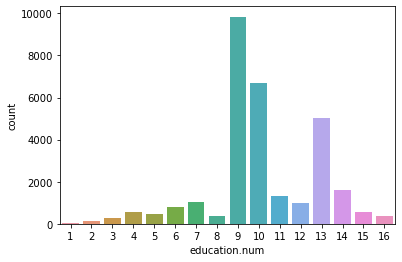

In [36]:
sns.countplot(x = census['education.num'])

### marital.status

- Sem valores inválidos

In [37]:
census['marital.status'].value_counts(dropna = False)

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital.status, dtype: int64

<AxesSubplot:xlabel='count', ylabel='marital.status'>

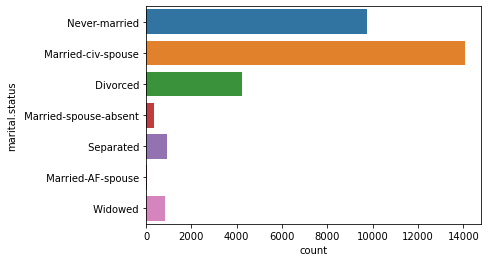

In [47]:
sns.countplot(y = census['marital.status'])

### occupation  

- Sem valores inválidos

In [42]:
census['occupation'].value_counts(dropna=False)

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

<AxesSubplot:xlabel='count', ylabel='occupation'>

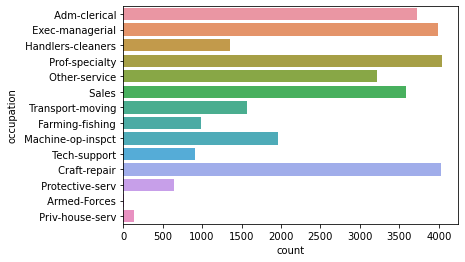

In [46]:
sns.countplot(y = census['occupation'])

### relationship 

- Sem valores inválidos

In [51]:
census['relationship'].value_counts(dropna= False)

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
Name: relationship, dtype: int64

<AxesSubplot:xlabel='count', ylabel='relationship'>

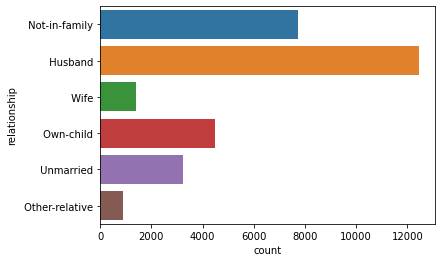

In [52]:
sns.countplot(y = census.relationship)

### Race

- Sem valores inválidos

In [54]:
census['race'].value_counts(dropna= False)

 White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

<AxesSubplot:xlabel='count', ylabel='race'>

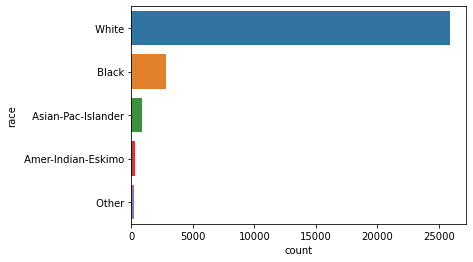

In [55]:
sns.countplot(y = census.race)

### sex

- Sem valores inválidos

In [56]:
census['sex'].value_counts(dropna = False)

 Male      20380
 Female     9782
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

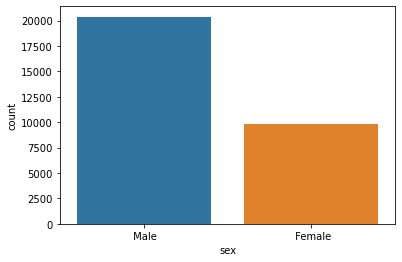

In [57]:
sns.countplot(x = census.sex)

### capital.gain

- Sem valores inválidos

In [60]:
print(census['capital.gain'].isna().sum(), census['capital.gain'].isnull().sum())

0 0


<AxesSubplot:xlabel='capital.gain', ylabel='Count'>

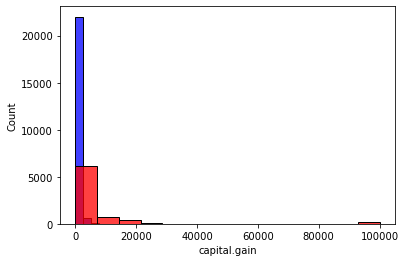

In [66]:
sns.histplot(x = 'capital.gain', data = census[census.income == ' <=50K'], color = 'blue')
sns.histplot(x = 'capital.gain', data = census[census.income != ' <=50K'], color = 'red')

### capital.loos

- Sem valores inválidos

In [60]:
print(census['capital.loos'].isna().sum(), census['capital.loos'].isnull().sum())

0 0


<AxesSubplot:xlabel='capital.loos', ylabel='Count'>

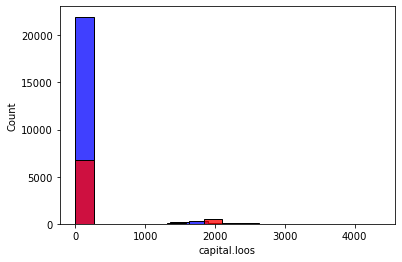

In [67]:
sns.histplot(x = 'capital.loos', data = census[census.income == ' <=50K'], color = 'blue')
sns.histplot(x = 'capital.loos', data = census[census.income != ' <=50K'], color = 'red')

### hour.per.week

- Sem valores inválidos

In [70]:
print(census['hour.per.week'].isna().sum(), census['hour.per.week'].isnull().sum())

0 0


<AxesSubplot:xlabel='hour.per.week', ylabel='Count'>

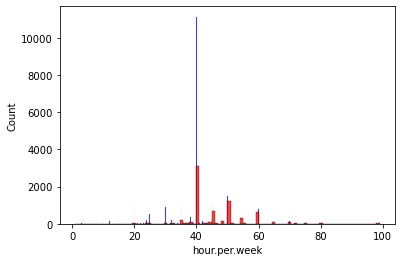

In [71]:
sns.histplot(x = 'hour.per.week', data = census[census.income == ' <=50K'], color = 'blue')
sns.histplot(x = 'hour.per.week', data = census[census.income != ' <=50K'], color = 'red')

### native.country

- Sem valores inválidos

In [72]:
print(census['native.country'].isna().sum(), census['native.country'].isnull().sum())

0 0


<AxesSubplot:xlabel='count', ylabel='native.country'>

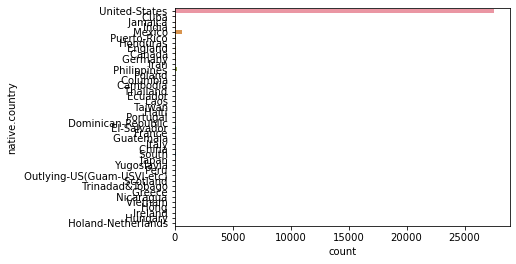

In [73]:
sns.countplot(y = census['native.country'])

### income 

- Sem valores inválidos

In [74]:
census['income'].value_counts(dropna = False)

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

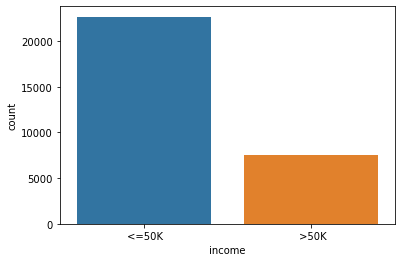

In [75]:
sns.countplot(x = census.income)

# Base de Dados de Crédito

In [76]:
credit = pd.read_csv('datasets/credit_data.csv', index_col='clientid')
credit.head()

,income,age,loan,default
clientid,,,,
1,66155.925095,59.017015,8106.532131,0
2,34415.153966,48.117153,6564.745018,0
3,57317.170063,63.108049,8020.953296,0
4,42709.534201,45.751972,6103.642260,0
5,66952.688845,18.584336,8770.099235,1


## Análise dos Dados

- cliente_id - Nonimal (fica fora da previsão)
- income - Numérica Contínua
- age - Numérica Contínua (neste caso)
- loan (dívida) - Numérica Contínua
- default - 0 (não pagou) 1 (pagou empréstimo) - Numérica Discreta

In [77]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   income   2000 non-null   float64
 1   age      1997 non-null   float64
 2   loan     2000 non-null   float64
 3   default  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 78.1 KB


## Sumário Estatístico

In [78]:
credit.describe()

,income,age,loan,default
count,2000.000000,1997.000000,2000.000000,2000.000000
mean,45331.600018,40.807559,4444.369695,0.141500
std,14326.327119,13.624469,3045.410024,0.348624
min,20014.489470,-52.423280,1.377630,0.000000
25%,32796.459717,28.990415,1939.708847,0.000000
50%,45789.117313,41.317159,3974.719419,0.000000
75%,57791.281668,52.587040,6432.410625,0.000000
max,69995.685578,63.971796,13766.051239,1.000000


## Estudo das Variáveis

### income

- Sem valores inválidos

In [81]:
print(credit['income'].isna().sum(),credit['income'].isnull().sum())

0 0


<AxesSubplot:xlabel='income', ylabel='Count'>

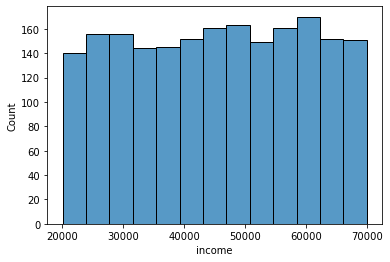

In [82]:
sns.histplot(x = credit.income)

### age

- Valores faltantes
- Valores inválidos 
    - Idade negativa

In [84]:
credit['age'].describe()

count    1997.000000
mean       40.807559
std        13.624469
min       -52.423280
25%        28.990415
50%        41.317159
75%        52.587040
max        63.971796
Name: age, dtype: float64

In [86]:
print(credit['age'].isna().sum(), credit['age'].isnull().sum())

3 3


<AxesSubplot:xlabel='age', ylabel='Count'>

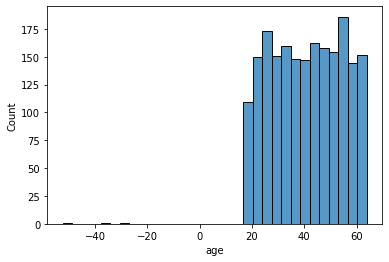

In [87]:
sns.histplot(x = credit.age)

### loan

In [90]:
print(credit['loan'].isna().sum(), credit['loan'].isnull().sum())

0 0


<AxesSubplot:xlabel='loan', ylabel='Count'>

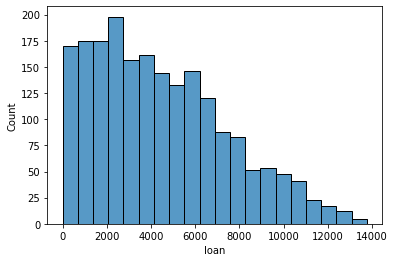

In [91]:
sns.histplot(x = credit.loan)

### default

In [93]:
credit['default'].value_counts()

0    1717
1     283
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

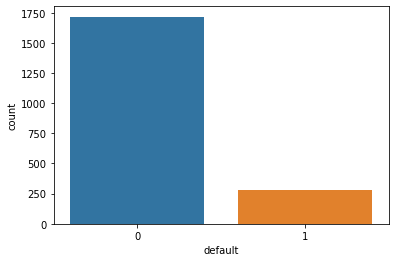

In [96]:
sns.countplot(x = credit.default)

# Base de Dados de Risco de Crédito

In [97]:
risco = pd.read_csv('datasets/risco_credito.csv')
risco.head()

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


## Análise dos Dados

- história - Categórica Nominal
- divida - Categórica Ordinal
- garandias - Categórica Nominal
- renda - Categórica Ordinal
- risco - Categórica Ordinal

In [98]:
risco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   historia   14 non-null     object
 1   divida     14 non-null     object
 2   garantias  14 non-null     object
 3   renda      14 non-null     object
 4   risco      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


## Sumário Estatístico

In [99]:
risco.describe()

,historia,divida,garantias,renda,risco
count,14,14,14,14,14
unique,3,2,2,3,3
top,desconhecida,alta,nenhuma,acima_35,alto
freq,5,7,11,7,6


## Estudo das Variáveis

### historia

In [102]:
risco['historia'].value_counts(dropna = False)

desconhecida    5
boa             5
ruim            4
Name: historia, dtype: int64

<AxesSubplot:xlabel='historia', ylabel='count'>

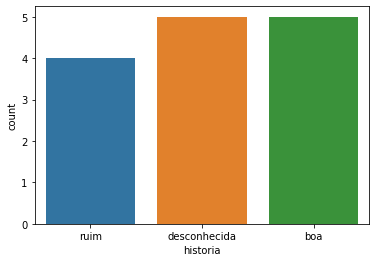

In [103]:
sns.countplot(x = risco.historia)

### divida

In [104]:
risco['divida'].value_counts(dropna = False)

alta     7
baixa    7
Name: divida, dtype: int64

<AxesSubplot:xlabel='divida', ylabel='count'>

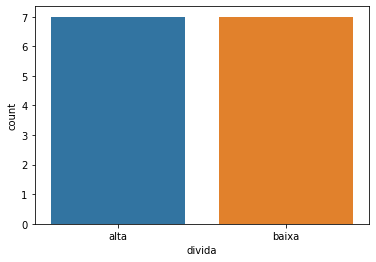

In [105]:
sns.countplot(x = risco.divida)

### garantias

In [106]:
risco['garantias'].value_counts(dropna = False)

nenhuma     11
adequada     3
Name: garantias, dtype: int64

<AxesSubplot:xlabel='garantias', ylabel='count'>

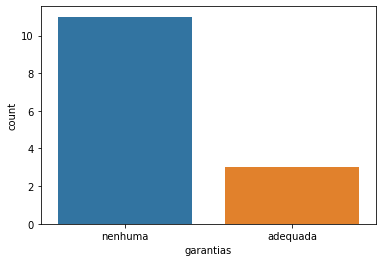

In [107]:
sns.countplot(x = risco.garantias)

### renda

In [104]:
risco['renda'].value_counts(dropna = False)

alta     7
baixa    7
Name: divida, dtype: int64

<AxesSubplot:xlabel='renda', ylabel='count'>

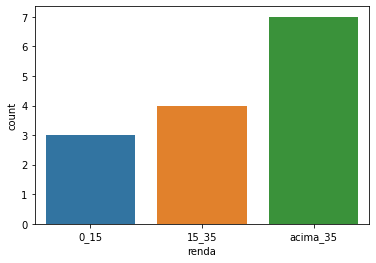

In [108]:
sns.countplot(x = risco.renda)

### risco

In [110]:
risco['risco'].value_counts(dropna = False)

alto        6
baixo       5
moderado    3
Name: risco, dtype: int64

<AxesSubplot:xlabel='risco', ylabel='count'>

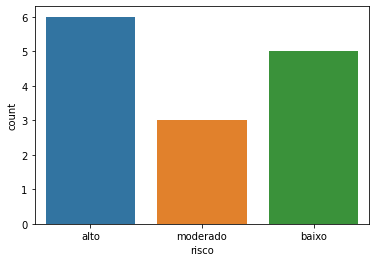

In [109]:
sns.countplot(x = risco.risco)